# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [322]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
import warnings
import numpy as np
import os
warnings.filterwarnings('ignore')

In [323]:
browser = Browser('chrome', executable_path = ChromeDriverManager().install())

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [324]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [325]:
# Create a Beautiful Soup Object
if browser.is_text_present("This is Mars data."):
    html = browser.html
    soup = bs(html, 'html.parser')

In [326]:
# Extract all rows of data
'''  
Headers don't have a class
<tr>
    <th>id</th>
    <th>terrestrial_date</th>
    <th>sol</th>
    <th>ls</th>
    <th>month</th>
    <th>min_temp</th>
    <th>pressure</th>
</tr>

Data contain the class
<tr class="data-row">
    <td>2</td>
    <td>2012-08-16</td>
    <td>10</td>
    <td>155</td>
    <td>6</td>
    <td>-75.0</td>
    <td>739.0</td>
</tr>
'''
rows = soup.find_all('tr', class_='data-row')
len(rows)

1867

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [327]:
# Create an empty list
lst = list()

# Loop through the scraped data to create a list of rows
headers = soup.find_all('tr')[0].text.split()
lst.append(headers)
for line in rows:
    row_data = line.text.split()
    lst.append(row_data) 

for lm in lst:print(lm)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

In [328]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
lst_df = pd.DataFrame(lst[1:], columns=lst[0])

In [329]:
# Confirm DataFrame was created successfully
# lst_df.set_index('id', inplace=True) maybe needed, do not know. 
lst_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [330]:
# Examine data type of each column
print(lst_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [331]:
# Change data types for data analysis
lst_df = lst_df.astype({
    'id': int,
    'terrestrial_date': 'datetime64[D]',
    'sol': int,
    'ls': int,
    'month': int,
    'min_temp': float,
    'pressure': float,
    })
# lst_df.head()

In [332]:
# Confirm type changes were successful by examining data types again
print(lst_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [333]:
# id: the identification number of a single transmission from the Curiosity rover
# terrestrial_date: the date on Earth
# sol: the number of elapsed sols (Martian days) since Curiosity landed on Mars
# ls: the solar longitude
# month: the Martian month
# min_temp: the minimum temperature, in Celsius, of a single Martian day (sol)
# pressure: The atmospheric pressure at Curiosity's location


# 1. How many months are there on Mars?
mars_months = lst_df['month'].unique()

# len(mars_months)
# according to NASA.gov there are 24 months in marshttps://mars.nasa.gov/resources/21392/mars-in-a-minute-how-long-is-a-year-on-mars/ 
print(f'On Mars ther are {len(mars_months)} months according to this data.')

On Mars ther are 12 months according to this data.


In [334]:
# 2. How many Martian days' worth of data are there?
# https://spaceplace.nasa.gov/days/en/ states there are 25 hours in a martian day
count_of_martian_days = len((lst_df['sol']))
# c = 0
# for row in lst_df['sol']:
#     c +=1
# print(c)
# anotherCount = len(lst_df. index)
# print(anotherCount)
# Discovered there are some gaps in the SOL, from 17th to 21st 
print(f'Length of unique martian days in the dataset is {count_of_martian_days}')
count = lst_df['sol'].count()
print(f'Count of solar days is {count}')
count = len(lst_df['sol'].unique())
# len(lst_df['terrestrial_date'])
print(f'There are {count} days worth of martian days data')

Length of unique martian days in the dataset is 1867
Count of solar days is 1867
There are 1867 days worth of martian days data


In [335]:
# 3. What is the average low temperature by month?
min_ave_temp = lst_df.groupby(['month']).mean()['min_temp']
min_ave_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

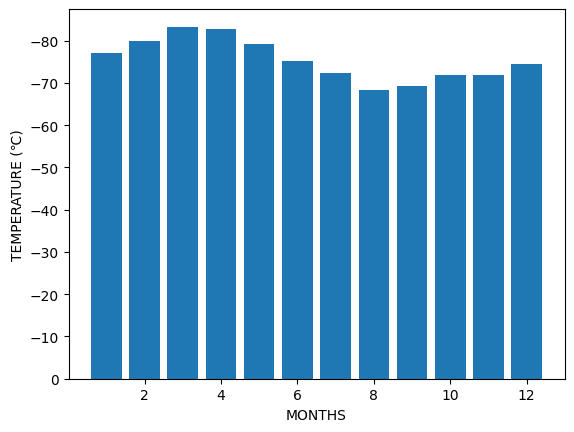

In [336]:
# Plot the average temperature by month
path = "./Resources"
pathExists = os.path.exists(path)
if not pathExists:
   os.makedirs(path)

plt.bar(min_ave_temp.index, min_ave_temp)
plt.xlabel('MONTHS')
plt.ylabel('TEMPERATURE (\u2103)')
plt.gca().invert_yaxis()
plt.savefig(path + '/mars_average_temp_by_month.jpg')


In [337]:

# Identify the coldest and hottest months in Curiosity's location

# df_grouped = lst_df.groupby('month').agg({'min_temp': ['max', 'min']})
# df_grouped = lst_df.groupby('month').agg({'min_temp': [ 'min']})
# lst_df['min_temp'] = pd.to_numeric(lst_df['min_temp'])

m_tinemp_row = lst_df.loc[lst_df['min_temp'].idxmin()]
m_temp_month = m_tinemp_row['month'] 
m_temp = m_tinemp_row['min_temp'] 

max_temp_row = lst_df.loc[lst_df['min_temp'].idxmax()]
h_temp_month = max_temp_row['month'] 
h_temp = max_temp_row['min_temp'] 

print(f'The {m_temp_month}rd month is the coldest with a temperature of {m_temp} degrees')
print(f'The {h_temp_month}st month is the hottest with a temperature of {h_temp} degrees')

The 3rd month is the coldest with a temperature of -90.0 degrees
The 1st month is the hottest with a temperature of -62.0 degrees


In [338]:
# 4. Average pressure by Martian month   id	terrestrial_date	sol	ls	month	min_temp	pressure
ave_pressure = lst_df.groupby(['month']).mean()['pressure']
ave_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

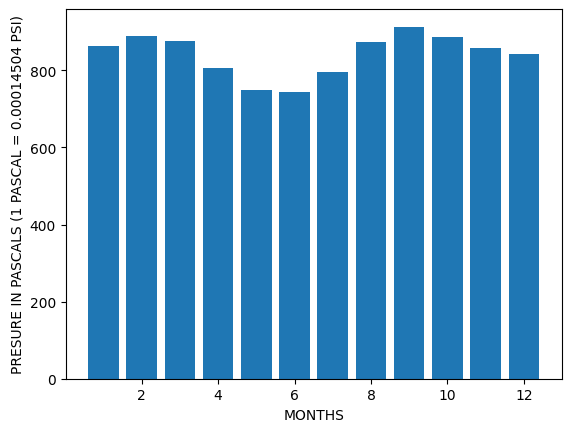

In [339]:
# Plot the average pressure by month
plt.bar(ave_pressure.index, ave_pressure)
plt.xlabel('MONTHS')
plt.ylabel('PRESURE IN PASCALS (1 PASCAL = 0.00014504 PSI)')
plt.savefig(path + '/mars_average_pressure_by_month.jpg')

In the plot below we can see the approximate distance in days from each low-temperature peak.
From approximately day 110 to day 710 we have 600 days. 
From approximately day 710 to day 1370 we have 660 days.
We could say that based on this plot a year in Mars is approximately ~630 terrestrial days.
A similar length of days results if we use the high temperature peaks of 440, 1100 and 1750, ~650 days.
According to NASA https://tinyurl.com/4zbfa76j there are 687 Earth days per or one Mars year.
The temperature data shows a good approximation of the number of terrestrial days it takes for Mars to orbit the sun. 


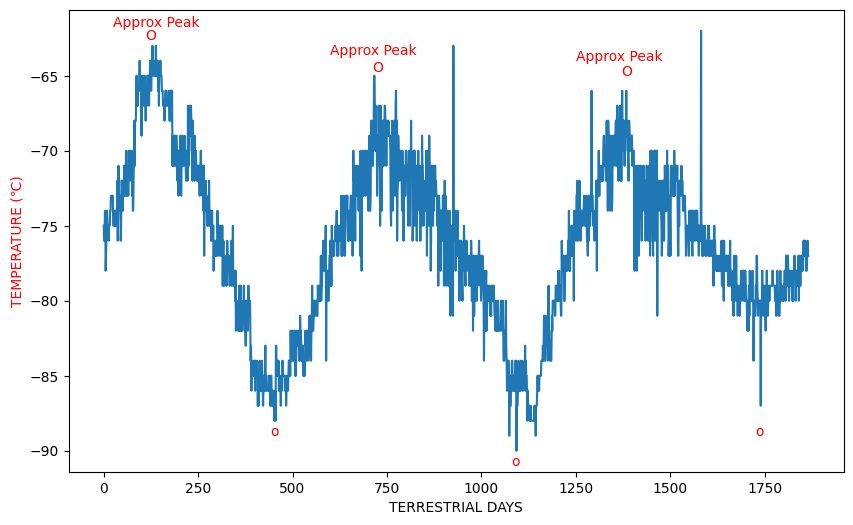

<Figure size 640x480 with 0 Axes>

In [340]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Consider how many days elapse on Earth in the time that Mars circles the Sun once. 
# Visually estimate the result by plotting the daily minimum temperature
# value = lst_df.iloc[500:1455]['pressure'] #This is to plot just a year but not what is needed in this project
print("In the plot below we can see the approximate distance in days from each low-temperature peak.")
print("From approximately day 110 to day 710 we have 600 days. ")
print("From approximately day 710 to day 1370 we have 660 days.")
print("We could say that based on this plot a year in Mars is approximately ~630 terrestrial days.")
print("A similar length of days results if we use the high temperature peaks of 440, 1100 and 1750, ~650 days.")
print("According to NASA https://tinyurl.com/4zbfa76j there are 687 Earth days per or one Mars year.")
print("The temperature data shows a good approximation of the number of terrestrial days it takes for Mars to orbit the sun. ")
plt.figure(figsize=(10,6))
plt.plot(lst_df['min_temp'])
plt.xlabel('TERRESTRIAL DAYS')
plt.ylabel('TEMPERATURE (\u2103)', color='red')
# plt.gca().invert_yaxis()
plt.text(1250,-64, 'Approx Peak', color='red')
plt.text(1370,-65, 'O', color='red')
##################################################
plt.text(600,-63.6, 'Approx Peak ', color='red')
plt.text(710,-64.7, 'O', color='red')
##################################################
plt.text(25,-61.7, 'Approx Peak', color='red')
plt.text(110,-62.6, 'O', color='red')
##################################################
plt.text(440,-89, 'o', color='red')
plt.text(1080,-91, 'o', color='red')
plt.text(1725,-89, 'o', color='red')
##################################################
plt.show()
plt.savefig(path + '/mars_687days_daily_minimum_temperature.jpg')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [341]:
# Write the data to a CSV

lst_df.to_csv(path + '/mars_weather.csv')
ave_pressure.to_csv(path + '/mars_ave_pressure.csv')
min_ave_temp.to_csv(path + '/mars_min_ave_temp.csv')


In [342]:
browser.quit()